In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Analisi Temporale della difficoltà

In [7]:
from datetime import datetime

In [8]:
path_file="/home/ettore1461/Scrivania/Dati Cesare/difficulty.csv"
Dati=pd.read_csv(path_file,names=["Data","Value"])

In [9]:
str2date=lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
Dati.Data=Dati.Data.apply(str2date)

In [10]:
Dati.head()

,Data,Value
0,2017-04-17,5.208087e+11
1,2017-04-18,5.208087e+11
2,2017-04-19,5.208087e+11
3,2017-04-20,5.208087e+11
4,2017-04-21,5.208087e+11


In [11]:
from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [12]:
# Create a figure with x_axis_type="datetime": p
p = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label='Difficult')
source=ColumnDataSource(Dati)
p.line(source=source,x="Data",y="Value")
show(p)

In [13]:
from math import log
Dati["logValue"]=Dati.Value.apply(log)

In [14]:
p = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label='log(Difficult)')
source=ColumnDataSource(Dati)
p.line(source=source,x="Data",y="logValue")
show(p)

(array([   1.,    1.,    0.,    1.,    1.,    3.,  316.,    4.,    4.,
           4.,    5.,    2.,    4.,    3.,    2.,    1.,    2.,    3.,
           1.,    0.,    3.,    0.,    0.,    1.,    0.,    1.,    0.,
           0.,    0.,    1.]),
 array([-0.04229439, -0.03543658, -0.02857878, -0.02172098, -0.01486318,
        -0.00800537, -0.00114757,  0.00571023,  0.01256803,  0.01942584,
         0.02628364,  0.03314144,  0.03999925,  0.04685705,  0.05371485,
         0.06057265,  0.06743046,  0.07428826,  0.08114606,  0.08800386,
         0.09486167,  0.10171947,  0.10857727,  0.11543507,  0.12229288,
         0.12915068,  0.13600848,  0.14286628,  0.14972409,  0.15658189,
         0.16343969]),
 <a list of 30 Patch objects>)

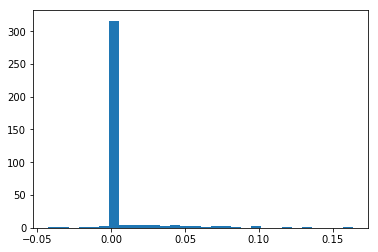

In [15]:
plt.hist(np.diff(Dati.logValue), bins=30)

In [16]:
pd.DataFrame({"Diff_LogValue":np.diff(Dati.logValue)}).describe()

,Diff_LogValue
count,364.000000
mean,0.005488
std,0.020548
min,-0.042294
25%,0.000000
50%,0.000000
75%,0.000000
max,0.163440


In [17]:
days20= lambda x: (x-Dati.Data.min()).days
Dati["Days_from_start"]=Dati.Data.apply(days20)

In [18]:
p = figure(x_axis_label='Date from start', y_axis_label='log(Difficult)')
source=ColumnDataSource(Dati)
p.line(source=source,x="Days_from_start",y="logValue")
show(p)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()

In [21]:
X=Dati.Days_from_start.values.reshape(-1,1)
Y=Dati.logValue.values.reshape(-1,1)
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
Dati["Linear_Pred"]=lr.predict(X)

In [23]:
p = figure(x_axis_label='Date from start', y_axis_label='log(Difficult)')
source=ColumnDataSource(Dati)
p.line(source=source,x="Days_from_start",y="logValue")
p.circle(source=source,x="Days_from_start",y="Linear_Pred",color="red",alpha=0.3,size=1)
show(p)

In [24]:
import statsmodels.api as sm

/home/ettore1461/anaconda3/envs/sheep/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [70]:
intercept=np.ones(X.shape)
temp=pd.DataFrame({"Diff":Y.reshape(X.size),"t":X.reshape(X.size),"t2":(X**2).reshape(X.size)
                  ,"int":intercept.reshape(X.size)
                  })
#mod=sm.OLS(Y,np.hstack((X**2,X,intercept)))
mod=sm.OLS(temp["Diff"],temp[["t","t2"
                             ,"int"
                             ]])

In [71]:
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Diff   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:33:51   Log-Likelihood:                 485.70
No. Observations:                 365   AIC:                            -965.4
Df Residuals:                     362   BIC:                            -953.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
t              0.0036      0.000     28.362      0.000       0.003       0.004
t2          5.756e-06   3.38e-07     17.003      0.000    5.09e-06    6.42e-06
int           26.9706      0.010   2689.335      0.000      26.951      26.990
==============================================================================
Omnibus:                        6.301   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.421
Skew:                          -0.306   Prob(JB):                       0.0403
Kurtosis:                       2.784   Cond. No.                     1.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
res.conf_int()

,0,1
t,0.003360,0.003860
t2,0.000005,0.000006
int,26.950873,26.990317


L'equazione è:

$\ln(Diff)=26.97+(5.756*10^{-6})t^2+0.0036t$

In [27]:
Dati["Pred_mod1"]=res.predict(np.hstack((X**2,X,intercept)))

In [28]:
p = figure(x_axis_label='Date from start', y_axis_label='log(Difficult)')
source=ColumnDataSource(Dati)
p.line(source=source,x="Days_from_start",y="logValue")
p.circle(source=source,x="Days_from_start",y="Pred_mod1",color="red",alpha=0.3,size=1)
show(p)

# Analisi con l'Hash-Rate

In [29]:
path_file2="/home/ettore1461/Scrivania/Dati Cesare/hash-rate.csv"
temp=pd.read_csv(path_file2,names=["Data","Value"])

In [30]:
Dati["HashRate"]=temp.Value

In [31]:
p = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label='HashRate')
source=ColumnDataSource(Dati)
p.line(source=source,x="Data",y="HashRate")
show(p)

In [32]:
Dati["log_HashRate"]=Dati.HashRate.apply(log)

In [33]:
p = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label="log(HashRate)")
source=ColumnDataSource(Dati)
p.line(source=source,x="Data",y="log_HashRate")
show(p)

In [34]:
X2=Dati.log_HashRate.values.reshape(-1,1)

In [35]:
mod2=sm.OLS(Y,np.hstack((X,X2,X2**2,intercept)))

In [36]:
res2=mod2.fit()

In [37]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.198e+04
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:27:03   Log-Likelihood:                 505.68
No. Observations:                 365   AIC:                            -1003.
Df Residuals:                     361   BIC:                            -987.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0048      0.000     34.946      0.000       0.005       0.005
x2            -4.8498      0.324    -14.950      0.000      -5.488      -4.212
x3             0.1548      0.010     15.738      0.000       0.135       0.174
const         64.9059      2.673     24.285      0.000      59.650      70.162
==============================================================================
Omnibus:                        1.368   Durbin-Watson:                   0.357
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.344
Skew:                          -0.148   Prob(JB):                        0.511
Kurtosis:                       2.967   Cond. No.                     2.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

L'equazione è:

$ \ln(Diff)=64.5+0.0048t-4.8498HashRate_t+0.1548(HashRate_t)^2$

In [38]:
Dati["Pred_mod2"]=res2.predict(np.hstack((X,X2,X2**2,intercept)))

In [39]:
p = figure(x_axis_label='Date from start', y_axis_label='log(Difficult)')
source=ColumnDataSource(Dati)
p.line(source=source,x="Days_from_start",y="logValue")
p.circle(source=source,x="Days_from_start",y="Pred_mod1",color="red",alpha=0.6,size=1.5,legend="Model1")
p.circle(source=source,x="Days_from_start",y="Pred_mod2",color="blue",alpha=0.6,size=2,legend="Model2")
show(p)

In [41]:
res2.conf_int(alpha=0.01)

array([[  4.48728540e-03,   5.20553492e-03],
       [ -5.68987289e+00,  -4.00980707e+00],
       [  1.29299997e-01,   1.80228053e-01],
       [  5.79849337e+01,   7.18269102e+01]])